In [ ]:
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     # for generating pdf

In [ ]:
m1 = [1,1]      # consider a random mean and covariance value
m2 = [7,7]
cov1 = [[3, 2], [2, 3]]
cov2 = [[2, -1], [-1, 2]]
x = np.random.multivariate_normal(m1, cov1, size=(200,))
y = np.random.multivariate_normal(m2, cov2, size=(200,))
d = np.concatenate((x, y), axis=0)

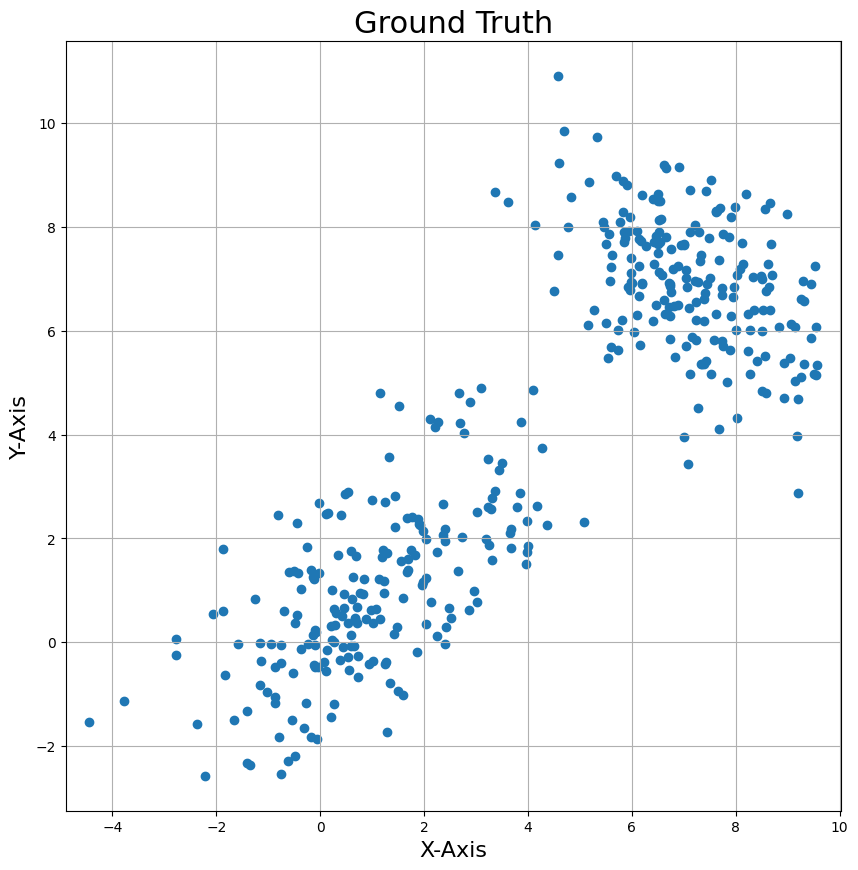

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(d[:,0], d[:,1], marker='o')
plt.axis('equal')
plt.xlabel('X-Axis', fontsize=16)
plt.ylabel('Y-Axis', fontsize=16)
plt.title('Ground Truth', fontsize=22)
plt.grid()
plt.show()

# plottingt the dataset

In [ ]:
import random

In [ ]:
m1 = random.choice(d)
m2 = random.choice(d)
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5


#  In summary, the code randomly selects two data points from the array d as mean vectors (m1 and m2).
# It then calculates the covariance matrices (cov1 and cov2) based on the data in d.
# Finally, it assigns a weight of 0.5 to each distribution using the variable pi.
#  The purpose and further use of these variables depend on the context of the code.

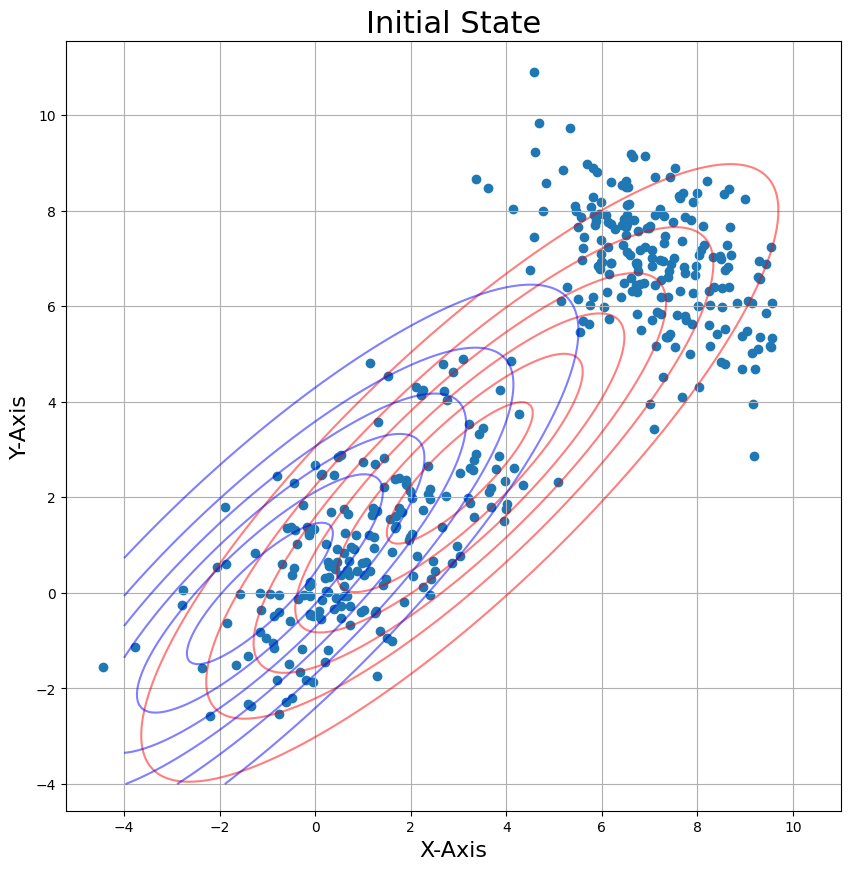

In [ ]:
x1 = np.linspace(-4,11,200)
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2)

Z1 = multivariate_normal(m1, cov1)
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(d[:,0], d[:,1], marker='o')
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

In [ ]:
##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]

    # probablity distribution function
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1

    # weight are calculated
    eval1 = w1/(w1+w2)

# finlly probablity expectasion is calculated
    return(eval1)

In [ ]:
## Maximization step
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2
    print(mu1)


    pi = sum(eval1)/len(d)

    lis2=[mu1,mu2,s1,s2,pi]
    print(mu1)
    print(mu2)
    return(lis2)



In [ ]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(d[:,0], d[:,1], marker='o')
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()

[5.07347352 4.61845471]
[5.07347352 4.61845471]
[1.83647278 2.51247959]


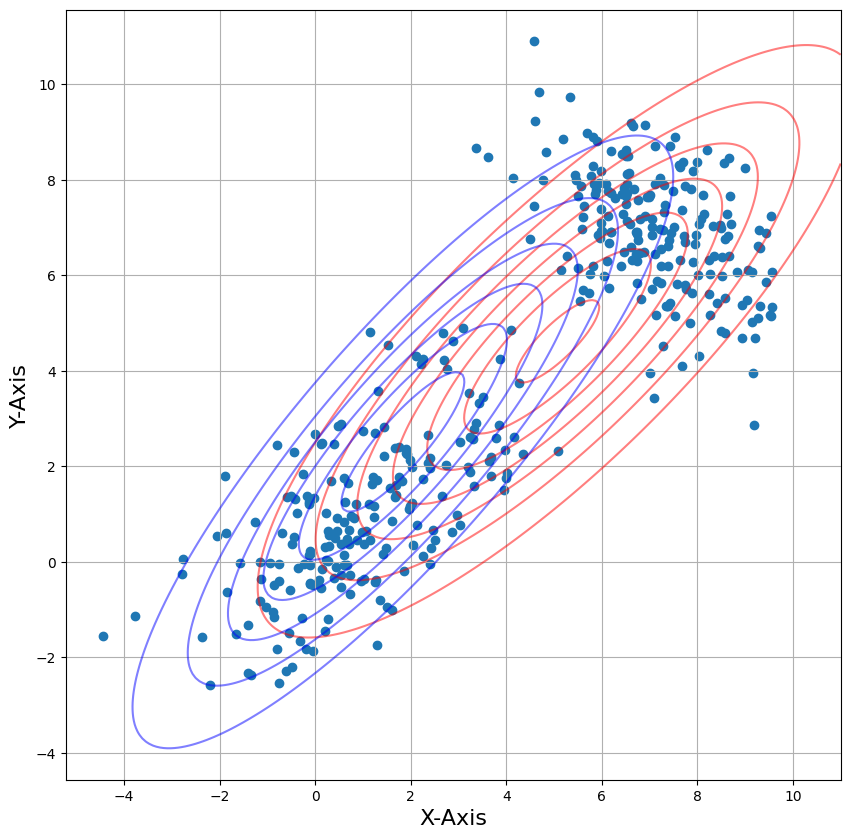

[5.14405843 4.70594144]
[5.14405843 4.70594144]
[1.7860354  2.39285415]
[5.24186924 4.81782586]
[5.24186924 4.81782586]
[1.70582379 2.24929978]
[5.36184141 4.95808971]
[5.36184141 4.95808971]
[1.59595991 2.06933232]
[5.50939127 5.13791704]
[5.50939127 5.13791704]
[1.44505885 1.83375057]


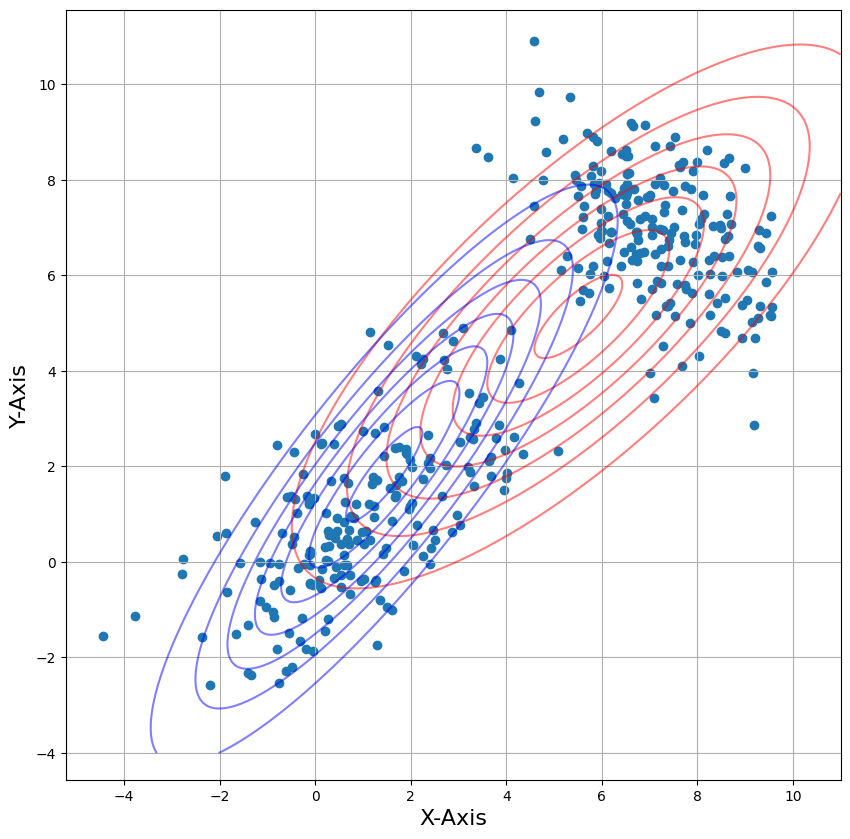

[5.69905567 5.3755662 ]
[5.69905567 5.3755662 ]
[1.23608052 1.52050807]
[5.95496418 5.69094589]
[5.95496418 5.69094589]
[0.96270686 1.1306076 ]
[6.28895365 6.07653704]
[6.28895365 6.07653704]
[0.7038627  0.77323978]
[6.61067631 6.42821324]
[6.61067631 6.42821324]
[0.64690143 0.65748474]
[6.8249949  6.66438914]
[6.8249949  6.66438914]
[0.75114258 0.72396568]


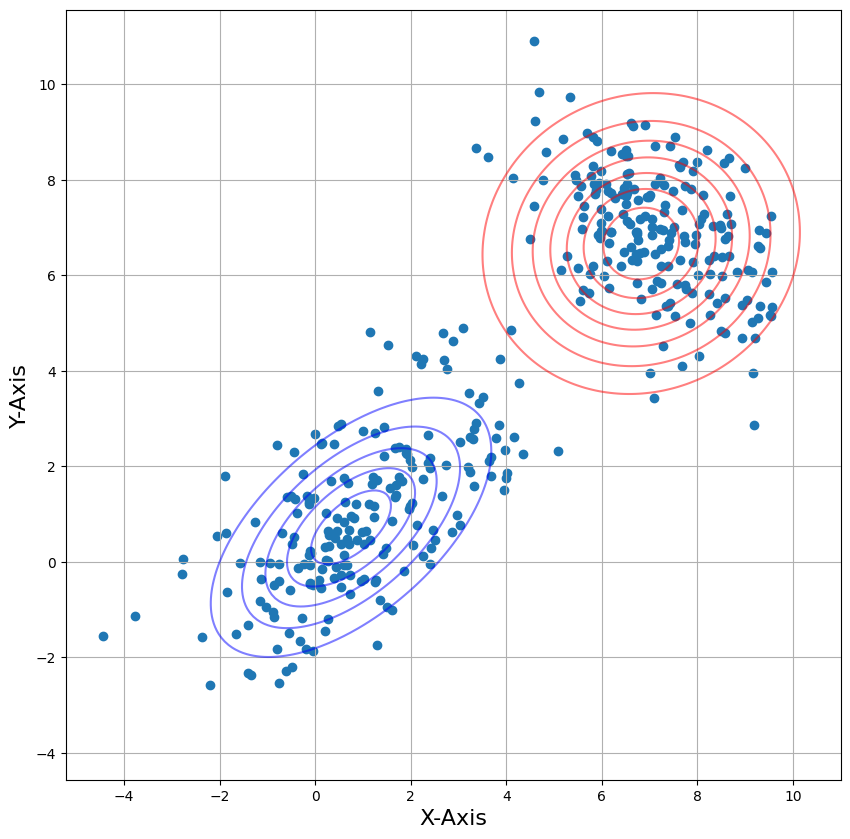

[7.01216167 6.8394617 ]
[7.01216167 6.8394617 ]
[0.88275855 0.86126371]
[7.11353302 6.9155137 ]
[7.11353302 6.9155137 ]
[0.95274749 0.95269831]
[7.12505848 6.9243773 ]
[7.12505848 6.9243773 ]
[0.96798038 0.96974859]
[7.12584486 6.92525371]
[7.12584486 6.92525371]
[0.97069251 0.97225502]
[7.12594089 6.9253776 ]
[7.12594089 6.9253776 ]
[0.97110321 0.97262104]


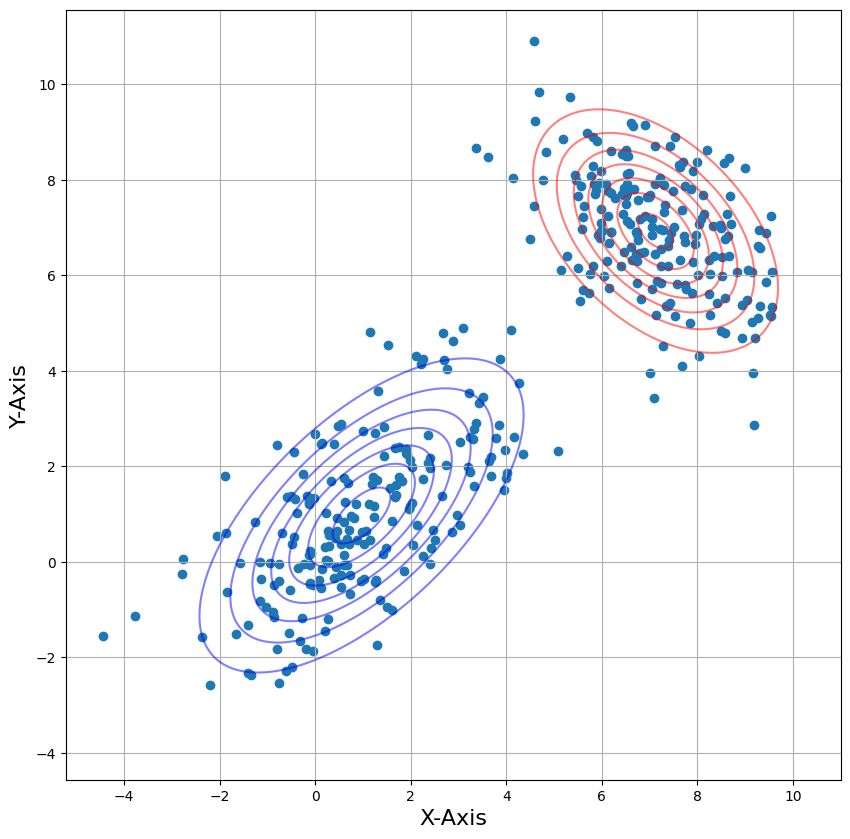

[7.12595473 6.92539615]
[7.12595473 6.92539615]
[0.97116466 0.97267529]
[7.12595679 6.92539893]
[7.12595679 6.92539893]
[0.97117384 0.97268337]
[7.12595709 6.92539935]
[7.12595709 6.92539935]
[0.97117521 0.97268458]
[7.12595714 6.92539941]
[7.12595714 6.92539941]
[0.97117542 0.97268476]
[7.12595714 6.92539942]
[7.12595714 6.92539942]
[0.97117545 0.97268478]


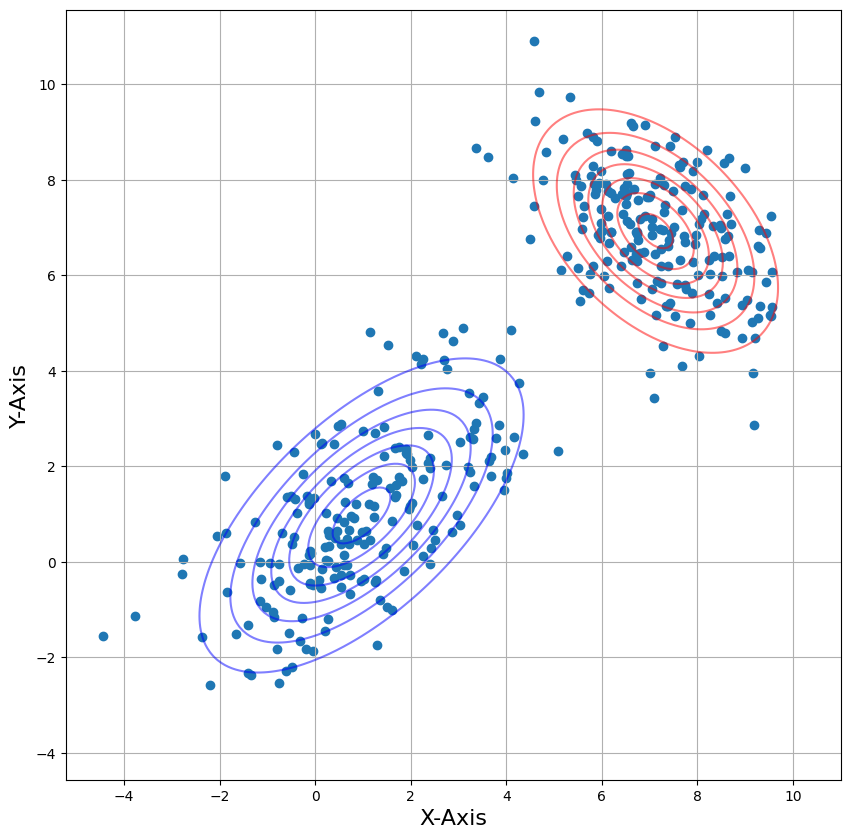

In [ ]:
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
        plot(lis1)